# Exploratory Data Analysis

In this notebook, the analysis made on data are written to understand which transformation were applied to the dataset to increase learning speed.

## Visualize data

Let's start by visualizing some of the samples in our dataset.
In the cells below, first the paths of all the video is loaded, and then we visualize the video loaded into memory.

In [3]:
from glob import glob
import sys
import os

current_path = !pwd
current_path = current_path[0]
video_dir = os.path.join(current_path, "mocogan", "resized_data")
video_paths = glob(os.path.join(video_dir, "*", "*"))

print(f"A video path is {video_paths[0]}")

A video path is /home/carlo/Documenti/Text2VideoGAN/mocogan/resized_data/Haircut/v_Haircut_g20_c05.mp4


In [40]:
from IPython.display import Video
import numpy as np

randomVideoIdx = np.random.randint(0, len(video_paths))
randomVideo = video_paths[randomVideoIdx]
randomVideoClass = randomVideo.split(os.sep)[-2]

print(f"Class of video chosen is: {randomVideoClass}")
Video(randomVideo, embed= True)

Class of video chosen is: PullUps


## Display frames from video

In this cell the video chosen before will be loaded with the same method used to load video into the notebook called `Train`.

The method uses the library Imageio that should come already installed with Ananconda.

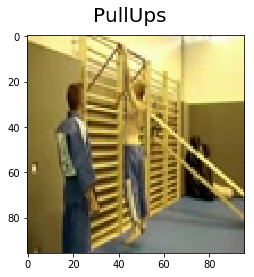

In [41]:
from mocogan.models import readVideoImageio
import pylab

def showFrame(frame, title = "Image"):
    fig = pylab.figure()
    fig.suptitle(title, fontsize=20)
    pylab.imshow(frame)
    pylab.show()


video = readVideoImageio(randomVideo)
randomFrameIdx = np.random.randint(0, len(video))

showFrame(video[randomFrameIdx], randomVideoClass)

## Torch VideoVision Repository

To perform data augmentation, the repository https://github.com/hassony2/torch_videovision.git was forked to add some transformation to the ones already implemented, since TorchVision in its current implementation does not provide Transformations for videos.

In the cells below, first the video path is loaded and then some transformations that were done to videos are shown.

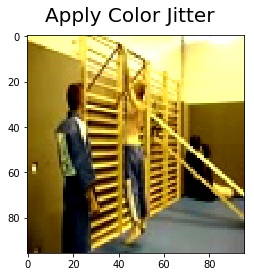

In [54]:
from torch_videovision.videotransforms.video_transforms import ColorJitter, TemporalCrop    
from torch_videovision.videotransforms.volume_transforms import ToTensor, ClipToTensor
from torchvision.transforms import Lambda, Compose

transformation = Compose([ ClipToTensor(numpy = True)])

jitter = ColorJitter(brightness=0.1, contrast=0.9, saturation=1, hue=-0.5)

jitteredVideo = jitter(video)

showFrame(jitteredVideo[randomFrameIdx], "Apply Color Jitter")

## Calculate Mean and Std of UCF_101

Since no statistics were found about Mean and Std of each of the channels (R, G, B) were found online, a Statistics Calculator was implemented to find out these data.
In this way, the normalization that will be done, before giving the data to the Neural Networks will be more effective on backpropagation.

In [56]:
import os
import sys
import skvideo.io

from mocogan.models import UCF_101
from torch.utils.data import DataLoader
from mocogan.utils import StatisticsCalculator


dataset = UCF_101(video_dir, skvideo.io.vread, supportedExtensions= ["mp4"], transform= transformation)
dataloader = DataLoader(dataset, batch_size= 1, num_workers= 8, pin_memory= True)

stat = StatisticsCalculator()

mean, std = stat.getStatistics(dataloader)

print(f"Mean of UCF_101 is {mean}. Std is {std}")

Mean is: [[1215.03666461 1165.32512469 1078.11767526]]


ValueError: operands could not be broadcast together with shapes (1,3,165,96,96) (1,3) 